In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Decision Tree example  (Пример дерева решений)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import export_text
import graphviz


## Три столбца бинарная классификация

In [ ]:
# Укажим путь к файлу с данными на моем диске
way = '/content/drive/MyDrive/Baza/Stag 3/df_iris_sagital17_4.xlsx'
df_irsa = pd.read_excel(way)  # Чтение данных из файла excel в pandas.DataFrame
print(df_irsa.shape)
li = df_irsa.columns.tolist()
print('len(li)', len(li))
df_irsa

(18, 5)
len(li) 5


,ID,PR2_norm_Lc<,PR2_norm_Lc>,PR2_norm_Lc^,diagnosis
0,Nw1,2.3,1.6,2.9,distal
1,Nw2,2.2,1.6,2.1,distal
2,Nw3,2.9,3.7,4.2,norm
3,Nw5,1.8,1.5,4.1,distal
4,Nw8,2.7,3.5,3.4,norm
5,Nw9,2.2,2.3,3.0,norm
6,Nw10,2.2,2.7,3.0,norm
7,Nw11,2.4,1.9,3.2,distal
8,Nw12,2.5,1.8,2.8,distal
9,Nw13,2.2,2.7,2.8,norm


In [4]:
#df_irsa.sort_values('PR2_norm_Lc^')

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
age_sal_tree = DecisionTreeClassifier( max_depth=3, random_state=17)
age_sal_tree.fit(df_irsa[['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^']].values, df_irsa['diagnosis'].values);

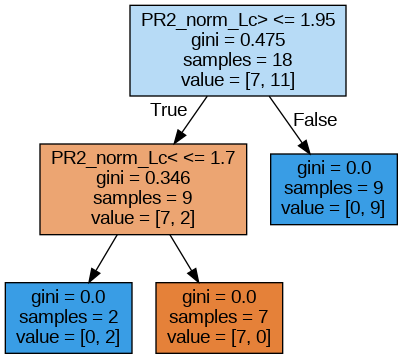

In [ ]:
export_graphviz(age_sal_tree, feature_names=['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^'],
                out_file='big_tree.dot', filled=True)
!dot -Tpng 'big_tree.dot' -o 'big_tree.png'
Image('big_tree.png')

## Три столбца N классов =4

In [ ]:
# Укажим путь к файлу с данными на моем диске
way = '/content/drive/MyDrive/Stag_3/df_iris_sagital215.xlsx'
df_irsa = pd.read_excel(way)  # Чтение данных из файла excel в pandas.DataFrame
print(df_irsa.shape)
li = df_irsa.columns.tolist()
print('len(li)', len(li))
df_irsa

(215, 12)
len(li) 12


,ID,PR2_norm_Lc<,PR2_norm_Lc>,PR2_norm_Lc^,Σ/2 / Lc^,Σ/2,Δ<,%,Lc < / Lc ^,Lc > / Lc ^,Σ(3),diagnosis
0,Nw1,2.3,1.6,2.9,0.672414,1.95,-0.35,-0.152174,0.793103,0.551724,6.8,distal
1,Nw2,2.2,1.6,2.1,0.904762,1.90,-0.30,-0.136364,1.047619,0.761905,5.9,distal
2,Nw5,1.8,1.5,4.1,0.402439,1.65,-0.15,-0.083333,0.439024,0.365854,7.4,distal
3,Nw8,2.7,3.5,3.4,0.911765,3.10,0.40,0.148148,0.794118,1.029412,9.6,norm
4,Nw9,2.2,2.3,3.0,0.750000,2.25,0.05,0.022727,0.733333,0.766667,7.5,norm
...,...,...,...,...,...,...,...,...,...,...,...,...
210,Nw255,1.3,1.6,3.1,0.467742,1.45,0.15,0.115385,0.419355,0.516129,6.0,komp
211,Nw257,1.5,1.3,1.1,1.272727,1.40,-0.10,-0.066667,1.363636,1.181818,3.9,komp
212,Nw260,1.4,1.0,1.0,1.200000,1.20,-0.20,-0.142857,1.400000,1.000000,3.4,komp
213,Nw261,1.6,2.3,2.8,0.696429,1.95,0.35,0.218750,0.571429,0.821429,6.7,komp


In [ ]:
li_pr = li[1:4]
li_pr

['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^']

вариант из лекции

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Инициализируем решающее дерево для классификации
age_sal_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)
                                                                               # способы выбора разбиений - criterion='entropy' - минимизация энтропии или максимизация прироста информации,
                                                                               # criterion=' ',  gini impurity неопределенность джини (используется по умолчанию)
                                                                               # criterion=' ', ошибка классификации
                                                                               # max_depth = 4 - глубина дерева считается по неравенствам
                                                                               # random_state=42 — можно указать для воспроизводимости экспериментов. См. ячейку ниже
                                                                               # min_samples_leaf=1  — минимальное количество элементов выборки, которые могут находиться в листовой вершине дерева
                                                                               # min_samples_split=2) - минимальное количество элементов, которое должно попасть в вершину, чтобы её можно было делить.
                                                                               # age_sal_tree(estimator) - инициализируемый классификатор
# Обучим решающее дерево (классификатор) на обучающей выборке
age_sal_tree.fit(df_irsa[['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^']].values, df_irsa['diagnosis'].values); # обучаем модель


**random_state**

Целое число - int, по умолчанию = Нет. Активный random_state = 17.
Управляет случайностью оценки. Объекты всегда переставляются случайным образом при каждом разделении, даже если для разделителя установлено значение "наилучший". Когда max_features < n_features, алгоритм выберет max_features случайным образом при каждом разбиении, прежде чем найдет наилучшее разбиение среди них. Но найденное наилучшее разбиение может отличаться в разных прогонах, даже если max_features=n_features. Это имеет место, если улучшение критерия идентично для нескольких разбиений, и одно разбиение должно быть выбрано случайным образом. Чтобы получить детерминированное поведение во время подгонки, random_state должно быть зафиксировано в виде целого числа. Подробности смотрите в глоссарии.

In [ ]:
# Создадим список классов по алфавиту
clas = list(df_irsa.diagnosis.unique())
print(type(clas))
print('Список классов из DS      ',clas)
class_names = sorted (clas)
print('Список классов по алфавиту', class_names)
#class_names = ['distal','distr' , 'komp', 'norm']
# class_names = ['a','b' , 'c', 'd']  # список классов должен быть отсортирован по алфавиту

<class 'list'>
Список классов из DS       ['distal', 'norm', 'komp', 'distr', 'mezial']
Список классов по алфавиту ['distal', 'distr', 'komp', 'mezial', 'norm']


In [ ]:
# Создадим список столбцов по которым будем строить дерево решений
list_data =  ['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^']

информация об обученном классификаторе

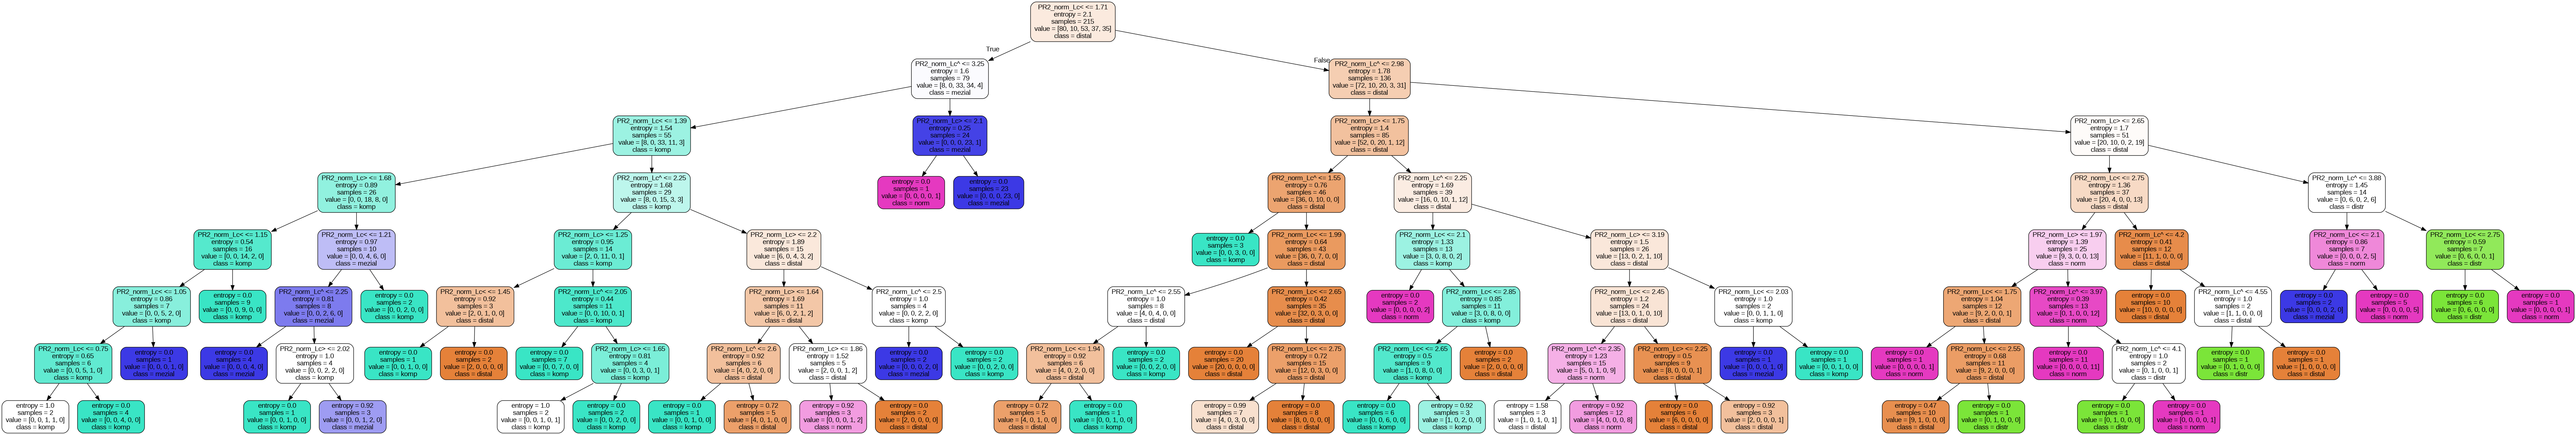

In [ ]:
# Эта функция генерирует представление дерева решений в GraphViz, которое затем записывается в out_file.
export_graphviz(age_sal_tree,                                                  # age_sal_tree- Дерево решений, которое будет экспортировано в GraphViz.
                feature_names= list_data,                                      # feature_names=['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^'], список параметров DS по которым строилось дерево
                out_file='big_tree.dot',                                       # out_file - экспортируйте дерево решений в файл в формате DOT = 'big_tree.dot' в текущуу папку colab.
                                                                               # Значение по умолчанию None. Если нет, результат возвращается в виде строки.
                class_names=class_names,                                       # class_names - rray-подобный, shape (n_classes,) или bool, по умолчанию = None
                                                                               # имена каждого из целевых классов в порядке возрастания числа или по алфавиту.
                                                                               # aктуально только для классификации и не поддерживается для множественного вывода.
                filled=True,                                                   # filled=True если установлено значение True, узлы подсвечиваются разным цветом чтобы указать класс
                rounded=True,                                                  # rounded=True, Если установлено значение True, нарисуйте прямоугольники узлов со скругленными углами.
                precision=2)                                                   # precision=2, Количество цифр точности с плавающей запятой в значениях атрибутов

!dot -Tpng 'big_tree.dot' -o 'big_tree.png'                                    # трансформируем файл dot в формат png, одновременно задаем имя файла
Image('big_tree.png')                                                          # вывод на экран изображения дерева в формате png

In [ ]:
x_trayn = df_irsa[li_pr].values
y_trayn = df_irsa['diagnosis'].values
predictions = age_sal_tree.predict(x_trayn)
print('Точность работы дерев на обучающей выборке:', round(accuracy_score(predictions, y_trayn),4))

Точность работы дерев на обучающей выборке: 0.9163


Другой способ экспорта дерева в файл png

In [ ]:
# import graphviz
dot_data = export_graphviz(age_sal_tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

Дерево можно экспортировать в текстовый формат

In [ ]:
# Дерево можно экспортировать в текстовый формат с помощью функции export_text.
# Этот метод не требует установки внешних библиотек и более компактен:

r = export_text(age_sal_tree, feature_names=list_data)
print(r)

|--- PR2_norm_Lc< <= 1.71
|   |--- PR2_norm_Lc^ <= 3.25
|   |   |--- PR2_norm_Lc< <= 1.39
|   |   |   |--- PR2_norm_Lc> <= 1.68
|   |   |   |   |--- PR2_norm_Lc< <= 1.15
|   |   |   |   |   |--- PR2_norm_Lc< <= 1.05
|   |   |   |   |   |   |--- PR2_norm_Lc< <= 0.75
|   |   |   |   |   |   |   |--- class: komp
|   |   |   |   |   |   |--- PR2_norm_Lc< >  0.75
|   |   |   |   |   |   |   |--- class: komp
|   |   |   |   |   |--- PR2_norm_Lc< >  1.05
|   |   |   |   |   |   |--- class: mezial
|   |   |   |   |--- PR2_norm_Lc< >  1.15
|   |   |   |   |   |--- class: komp
|   |   |   |--- PR2_norm_Lc> >  1.68
|   |   |   |   |--- PR2_norm_Lc< <= 1.21
|   |   |   |   |   |--- PR2_norm_Lc^ <= 2.25
|   |   |   |   |   |   |--- class: mezial
|   |   |   |   |   |--- PR2_norm_Lc^ >  2.25
|   |   |   |   |   |   |--- PR2_norm_Lc> <= 2.02
|   |   |   |   |   |   |   |--- class: komp
|   |   |   |   |   |   |--- PR2_norm_Lc> >  2.02
|   |   |   |   |   |   |   |--- class: mezial
|   |   |   |   |--

## Производные столбцы // N классов  = 5

In [ ]:
# Укажим путь к файлу с данными на моем диске
way = '/content/drive/MyDrive/Stag_3/df_iris_sagital215.xlsx'
df_irsa = pd.read_excel(way)  # Чтение данных из файла excel в pandas.DataFrame
print(df_irsa.shape)
li = df_irsa.columns.tolist()
print('len(li)', len(li))
df_irsa

(215, 12)
len(li) 12


,ID,PR2_norm_Lc<,PR2_norm_Lc>,PR2_norm_Lc^,Σ/2 / Lc^,Σ/2,Δ<,%,Lc < / Lc ^,Lc > / Lc ^,Σ(3),diagnosis
0,Nw1,2.3,1.6,2.9,0.672414,1.95,-0.35,-0.152174,0.793103,0.551724,6.8,distal
1,Nw2,2.2,1.6,2.1,0.904762,1.90,-0.30,-0.136364,1.047619,0.761905,5.9,distal
2,Nw5,1.8,1.5,4.1,0.402439,1.65,-0.15,-0.083333,0.439024,0.365854,7.4,distal
3,Nw8,2.7,3.5,3.4,0.911765,3.10,0.40,0.148148,0.794118,1.029412,9.6,norm
4,Nw9,2.2,2.3,3.0,0.750000,2.25,0.05,0.022727,0.733333,0.766667,7.5,norm
...,...,...,...,...,...,...,...,...,...,...,...,...
210,Nw255,1.3,1.6,3.1,0.467742,1.45,0.15,0.115385,0.419355,0.516129,6.0,komp
211,Nw257,1.5,1.3,1.1,1.272727,1.40,-0.10,-0.066667,1.363636,1.181818,3.9,komp
212,Nw260,1.4,1.0,1.0,1.200000,1.20,-0.20,-0.142857,1.400000,1.000000,3.4,komp
213,Nw261,1.6,2.3,2.8,0.696429,1.95,0.35,0.218750,0.571429,0.821429,6.7,komp


In [ ]:
#df_irsa.sort_values('PR2_norm_Lc^')

In [ ]:
li_pr = li[4:-1]
li_pr

['Σ/2 / Lc^', 'Σ/2', 'Δ<', '%', ' Lc < /  Lc ^ ', ' Lc > /  Lc ^ ', 'Σ(3)']

вариант из лекции

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Инициализируем решающее дерево для классификации
age_sal_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)
                                                                               # способы выбора разбиений - criterion='entropy' - минимизация энтропии или максимизация прироста информации,
                                                                               # criterion=' ',  gini impurity неопределенность джини (используется по умолчанию)
                                                                               # criterion=' ', ошибка классификации
                                                                               # max_depth = 4 - глубина дерева считается по неравенствам
                                                                               # random_state=42 — можно указать для воспроизводимости экспериментов. См. ячейку ниже
                                                                               # min_samples_leaf=1  — минимальное количество элементов выборки, которые могут находиться в листовой вершине дерева
                                                                               # min_samples_split=2) - минимальное количество элементов, которое должно попасть в вершину, чтобы её можно было делить.
                                                                               # age_sal_tree(estimator) - инициализируемый классификатор
# Обучим решающее дерево (классификатор) на обучающей выборке
#age_sal_tree.fit(df_irsa[['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^']].values, df_irsa['diagnosis'].values); # обучаем модель
age_sal_tree.fit(df_irsa[li_pr].values, df_irsa['diagnosis'].values); # обучаем модель


**random_state**

Целое число - int, по умолчанию = Нет. Активный random_state = 17.
Управляет случайностью оценки. Объекты всегда переставляются случайным образом при каждом разделении, даже если для разделителя установлено значение "наилучший". Когда max_features < n_features, алгоритм выберет max_features случайным образом при каждом разбиении, прежде чем найдет наилучшее разбиение среди них. Но найденное наилучшее разбиение может отличаться в разных прогонах, даже если max_features=n_features. Это имеет место, если улучшение критерия идентично для нескольких разбиений, и одно разбиение должно быть выбрано случайным образом. Чтобы получить детерминированное поведение во время подгонки, random_state должно быть зафиксировано в виде целого числа. Подробности смотрите в глоссарии.

In [ ]:
# Создадим список классов по алфавиту
clas = list(df_irsa.diagnosis.unique())
print(type(clas))
print('Список классов из DS      ',clas)
class_names = sorted (clas)
print('Список классов по алфавиту', class_names)
#class_names = ['distal','distr' , 'komp', 'norm']
# class_names = ['a','b' , 'c', 'd']  # список классов должен быть отсортирован по алфавиту

<class 'list'>
Список классов из DS       ['distal', 'norm', 'komp', 'distr', 'mezial']
Список классов по алфавиту ['distal', 'distr', 'komp', 'mezial', 'norm']


In [ ]:
# Создадим список столбцов по которым будем строить дерево решений
# list_data =  ['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^']
list_data =  li_pr

информация об обученном классификаторе

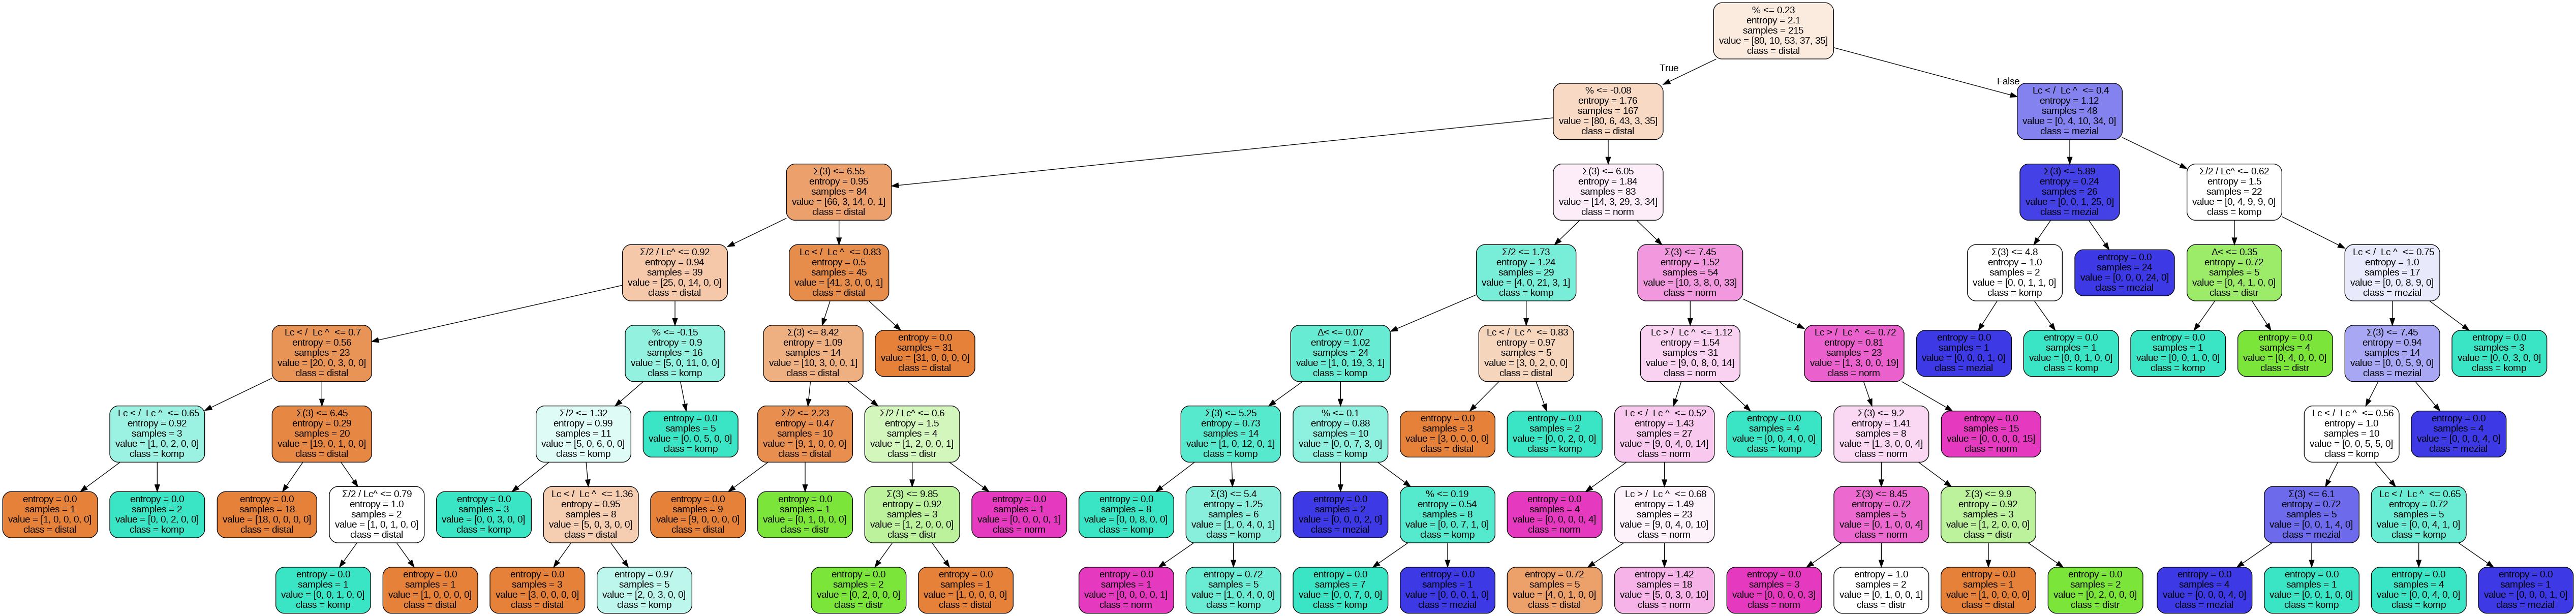

In [ ]:
# Эта функция генерирует представление дерева решений в GraphViz, которое затем записывается в out_file.
export_graphviz(age_sal_tree,                                                  # age_sal_tree- Дерево решений, которое будет экспортировано в GraphViz.
                feature_names= list_data,                                      # feature_names=['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^'], список параметров DS по которым строилось дерево
                out_file='big_tree.dot',                                       # out_file - экспортируйте дерево решений в файл в формате DOT = 'big_tree.dot' в текущуу папку colab.
                                                                               # Значение по умолчанию None. Если нет, результат возвращается в виде строки.
                class_names=class_names,                                       # class_names - rray-подобный, shape (n_classes,) или bool, по умолчанию = None
                                                                               # имена каждого из целевых классов в порядке возрастания числа или по алфавиту.
                                                                               # aктуально только для классификации и не поддерживается для множественного вывода.
                filled=True,                                                   # filled=True если установлено значение True, узлы подсвечиваются разным цветом чтобы указать класс
                rounded=True,                                                  # rounded=True, Если установлено значение True, нарисуйте прямоугольники узлов со скругленными углами.
                precision=2)                                                   # precision=2, Количество цифр точности с плавающей запятой в значениях атрибутов

!dot -Tpng 'big_tree.dot' -o 'big_tree.png'                                    # трансформируем файл dot в формат png, одновременно задаем имя файла
Image('big_tree.png')                                                          # вывод на экран изображения дерева в формате png

In [ ]:
x_trayn = df_irsa[li_pr].values
y_trayn = df_irsa['diagnosis'].values
predictions = age_sal_tree.predict(x_trayn)
print('Точность работы дерев на обучающей выборке:', round(accuracy_score(predictions, y_trayn),4))

Точность работы дерев на обучающей выборке: 0.9395


## Размеры 3 столбца и производные столбцы  всего 10  // N классов  = 5

In [6]:
# Укажим путь к файлу с данными на моем диске
way = '/content/drive/MyDrive/Stag_3/df_iris_sagital215.xlsx'
df_irsa = pd.read_excel(way)  # Чтение данных из файла excel в pandas.DataFrame
print(df_irsa.shape)
li = df_irsa.columns.tolist()
print('len(li)', len(li))
df_irsa

(215, 12)
len(li) 12


,ID,PR2_norm_Lc<,PR2_norm_Lc>,PR2_norm_Lc^,Σ/2 / Lc^,Σ/2,Δ<,%,Lc < / Lc ^,Lc > / Lc ^,Σ(3),diagnosis
0,Nw1,2.3,1.6,2.9,0.672414,1.95,-0.35,-0.152174,0.793103,0.551724,6.8,distal
1,Nw2,2.2,1.6,2.1,0.904762,1.90,-0.30,-0.136364,1.047619,0.761905,5.9,distal
2,Nw5,1.8,1.5,4.1,0.402439,1.65,-0.15,-0.083333,0.439024,0.365854,7.4,distal
3,Nw8,2.7,3.5,3.4,0.911765,3.10,0.40,0.148148,0.794118,1.029412,9.6,norm
4,Nw9,2.2,2.3,3.0,0.750000,2.25,0.05,0.022727,0.733333,0.766667,7.5,norm
...,...,...,...,...,...,...,...,...,...,...,...,...
210,Nw255,1.3,1.6,3.1,0.467742,1.45,0.15,0.115385,0.419355,0.516129,6.0,komp
211,Nw257,1.5,1.3,1.1,1.272727,1.40,-0.10,-0.066667,1.363636,1.181818,3.9,komp
212,Nw260,1.4,1.0,1.0,1.200000,1.20,-0.20,-0.142857,1.400000,1.000000,3.4,komp
213,Nw261,1.6,2.3,2.8,0.696429,1.95,0.35,0.218750,0.571429,0.821429,6.7,komp


In [7]:
li_pr = li[1:-1]
print(len(li_pr))
li_pr

10


['PR2_norm_Lc<',
 'PR2_norm_Lc>',
 'PR2_norm_Lc^',
 'Σ/2 / Lc^',
 'Σ/2',
 'Δ<',
 '%',
 ' Lc < /  Lc ^ ',
 ' Lc > /  Lc ^ ',
 'Σ(3)']

вариант из лекции

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Инициализируем решающее дерево для классификации
age_sal_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)
                                                                               # способы выбора разбиений - criterion='entropy' - минимизация энтропии или максимизация прироста информации,
                                                                               # criterion=' ',  gini impurity неопределенность джини (используется по умолчанию)
                                                                               # criterion=' ', ошибка классификации
                                                                               # max_depth = 4 - глубина дерева считается по неравенствам
                                                                               # random_state=42 — можно указать для воспроизводимости экспериментов. См. ячейку ниже
                                                                               # min_samples_leaf=1  — минимальное количество элементов выборки, которые могут находиться в листовой вершине дерева
                                                                               # min_samples_split=2) - минимальное количество элементов, которое должно попасть в вершину, чтобы её можно было делить.
                                                                               # age_sal_tree(estimator) - инициализируемый классификатор
# Обучим решающее дерево (классификатор) на обучающей выборке
#age_sal_tree.fit(df_irsa[['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^']].values, df_irsa['diagnosis'].values); # обучаем модель
age_sal_tree.fit(df_irsa[li_pr].values, df_irsa['diagnosis'].values); # обучаем модель


**random_state**

Целое число - int, по умолчанию = Нет. Активный random_state = 17.
Управляет случайностью оценки. Объекты всегда переставляются случайным образом при каждом разделении, даже если для разделителя установлено значение "наилучший". Когда max_features < n_features, алгоритм выберет max_features случайным образом при каждом разбиении, прежде чем найдет наилучшее разбиение среди них. Но найденное наилучшее разбиение может отличаться в разных прогонах, даже если max_features=n_features. Это имеет место, если улучшение критерия идентично для нескольких разбиений, и одно разбиение должно быть выбрано случайным образом. Чтобы получить детерминированное поведение во время подгонки, random_state должно быть зафиксировано в виде целого числа. Подробности смотрите в глоссарии.

In [ ]:
# Создадим список классов по алфавиту
clas = list(df_irsa.diagnosis.unique())
print(type(clas))
print('Список классов из DS      ',clas)
class_names = sorted (clas)
print('Список классов по алфавиту', class_names)
#class_names = ['distal','distr' , 'komp', 'norm']
# class_names = ['a','b' , 'c', 'd']  # список классов должен быть отсортирован по алфавиту

<class 'list'>
Список классов из DS       ['distal', 'norm', 'komp', 'distr', 'mezial']
Список классов по алфавиту ['distal', 'distr', 'komp', 'mezial', 'norm']


In [ ]:
# Создадим список столбцов по которым будем строить дерево решений
# list_data =  ['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^']
list_data =  li_pr

информация об обученном классификаторе

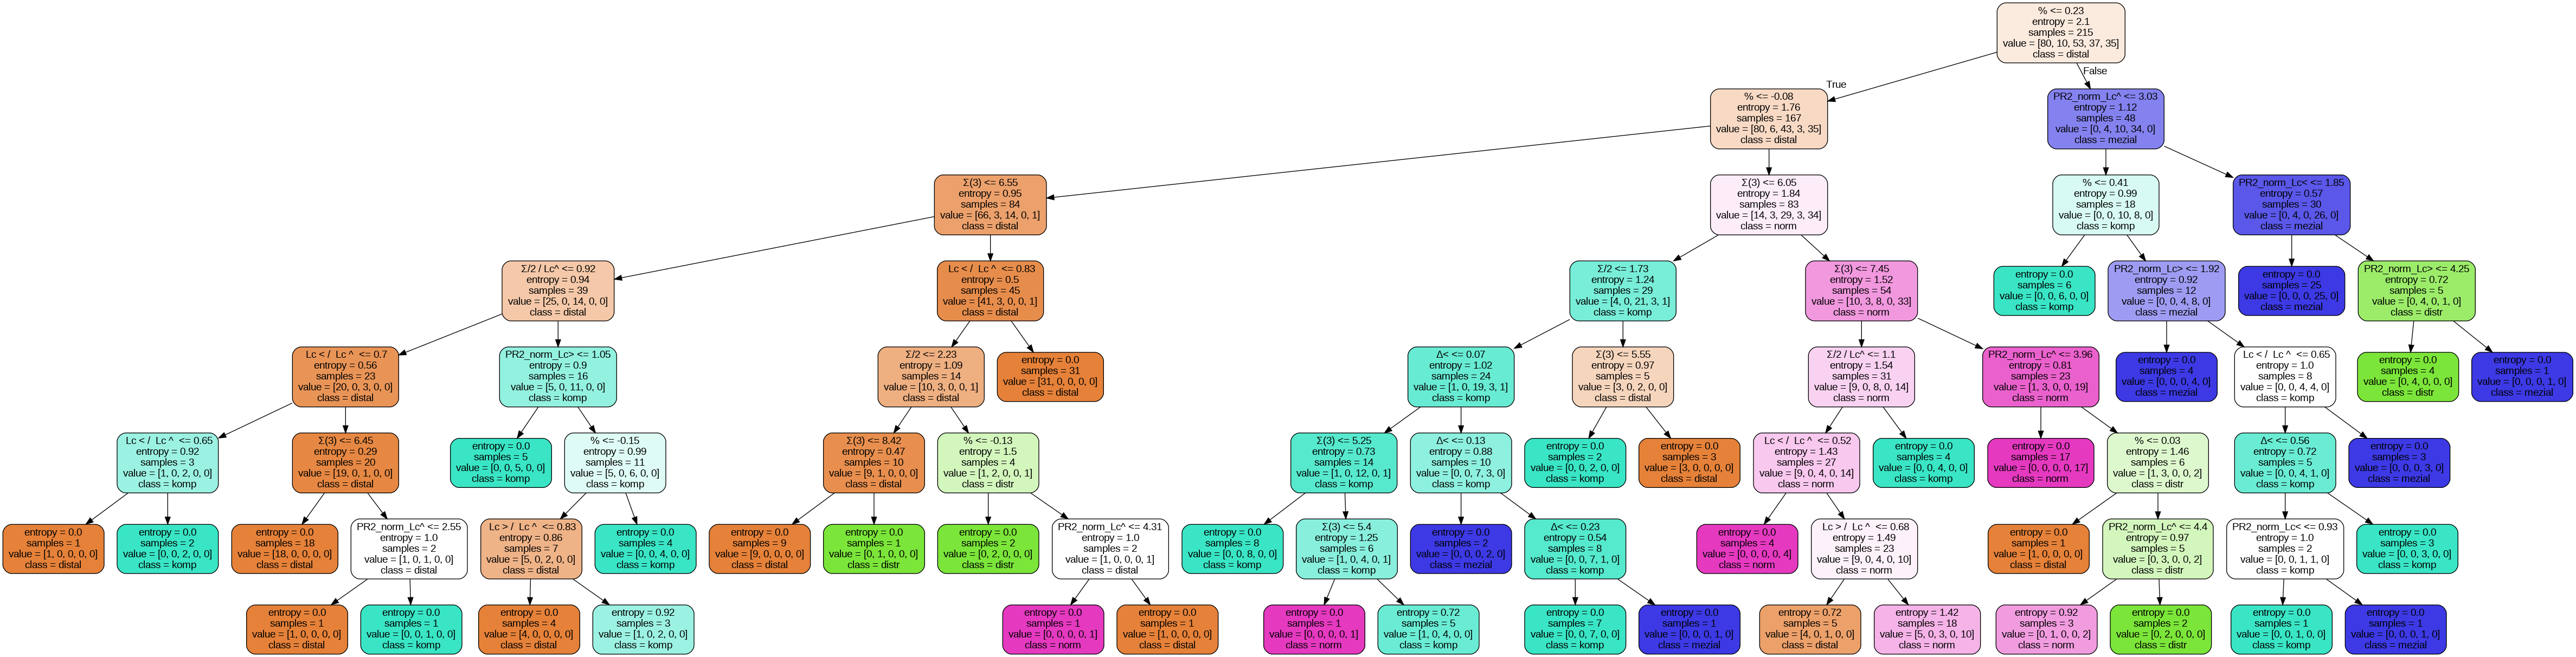

In [ ]:
# Эта функция генерирует представление дерева решений в GraphViz, которое затем записывается в out_file.
export_graphviz(age_sal_tree,                                                  # age_sal_tree- Дерево решений, которое будет экспортировано в GraphViz.
                feature_names= list_data,                                      # feature_names=['PR2_norm_Lc<', 'PR2_norm_Lc>', 'PR2_norm_Lc^'], список параметров DS по которым строилось дерево
                out_file='big_tree.dot',                                       # out_file - экспортируйте дерево решений в файл в формате DOT = 'big_tree.dot' в текущуу папку colab.
                                                                               # Значение по умолчанию None. Если нет, результат возвращается в виде строки.
                class_names=class_names,                                       # class_names - rray-подобный, shape (n_classes,) или bool, по умолчанию = None
                                                                               # имена каждого из целевых классов в порядке возрастания числа или по алфавиту.
                                                                               # aктуально только для классификации и не поддерживается для множественного вывода.
                filled=True,                                                   # filled=True если установлено значение True, узлы подсвечиваются разным цветом чтобы указать класс
                rounded=True,                                                  # rounded=True, Если установлено значение True, нарисуйте прямоугольники узлов со скругленными углами.
                precision=2)                                                   # precision=2, Количество цифр точности с плавающей запятой в значениях атрибутов

!dot -Tpng 'big_tree.dot' -o 'big_tree.png'                                    # трансформируем файл dot в формат png, одновременно задаем имя файла
Image('big_tree.png')                                                          # вывод на экран изображения дерева в формате png

In [ ]:
x_trayn = df_irsa[li_pr].values
y_trayn = df_irsa['diagnosis'].values
predictions = age_sal_tree.predict(x_trayn)
print('Точность работы дерев на обучающей выборке:', round(accuracy_score(predictions, y_trayn),4))

Точность работы дерев на обучающей выборке: 0.9442


## После обучения модель можно использовать для прогнозирования класса образцов:

In [ ]:
# После подбора модель можно использовать для прогнозирования класса образцов:
#pr = np.array([3.7,1.9,5.6,0.50,2.80,-0.90,-0.24,0.66,0.34,11.2])
pr = np.array([1.8,7.4,7.6,0.61,4.60,2.80,1.56,0.24,0.97,16.80])
#pr = np.array([2.6, 5.5, 4.6])
print(pr.shape)
pr = pr.reshape(1,-1)
print(pr.shape)

age_sal_tree.predict(pr)



(10,)
(1, 10)


array(['mezial'], dtype=object)

## Точность классификации

In [ ]:
# Посчитаем предсказания дерева и посчитаем точность полученной классификации.
# Точность классификации вычисляется как доля правильно предсказанных классов.

y_test = np.array(['distr'])
predictions = age_sal_tree.predict(pr)
accuracy_score(predictions, y_test)



1.0

In [ ]:
# В качестве альтернативы выводу определенного класса можно предсказать вероятность каждого класса,
# которая представляет собой долю обучающих выборок класса в листе:
#pr = np.array([2.6, 5.5, 4.6])
#print(pr.shape)
#pr = pr.reshape(1,-1)
#print(pr.shape)

age_sal_tree.predict_proba (pr) # можно предсказать вероятность каждого класса





array([[0., 0., 0., 1., 0.]])